# Desafios
<ul>
    <li> minerar toda base e observar distribuicao de idades menor de 14 *  </li>
   <li> ampliar para base de amostra observar menores de idades  </li>
   <li> criar uma função p/plotar boxplot com notas  </li>
   <li> verificar se quem zerou a prova foi eliminando ou não estava presente  </li>
   <li> quem é eliminado tira zero ou NaN (não teve registro de notas)</li>
   <li> analisar uf_reside e uf_realiza prova (municipio_reside e realiza)</li>
   <li> analisar quem tem veiculo ou não</li>
   <li> tem mais treineiro em classes mais ricas (proporção de participantes de rendas mais altas e mais baixas como treineiro ou nao treineiro)</li>
   <li> nota total q025 (se na residência tem internet)</li>
 <ul>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

In [3]:
source = "../data/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"
df = pd.read_csv(source)
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


# Proporção de quais estados de alunos com idade menores de 18 anos.

<AxesSubplot:>

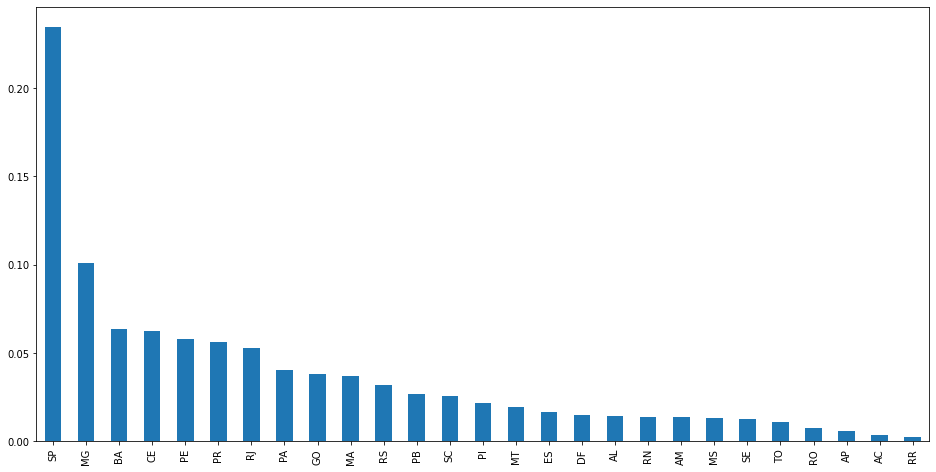

In [5]:
alunos17 =df.query("NU_IDADE <= 17")
alunos17["SG_UF_RESIDENCIA"].value_counts(normalize = True).plot.bar(figsize=(16,8))

In [14]:
def box(xparam, yparam, matisse, datadf, lista_ord, title):
  plt.figure(figsize=(14,8))
  sns.boxplot(x=xparam, y=yparam, data=datadf, hue= matisse, order=lista_ord)
  plt.title(title) 

In [7]:
renda_ord = df["Q006"].unique()
renda_ord.sort()

veiculo_ord = df["Q010"].unique()
veiculo_ord.sort()

provas = ["NU_NOTA_MT", "NU_NOTA_REDACAO", "NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_LC"]

df["NU_NOTA_TOTAL"] = df[provas].sum(axis=1)

provas.append("NU_NOTA_TOTAL")

df_sem_notas_zero = df.query("NU_NOTA_TOTAL != 0")

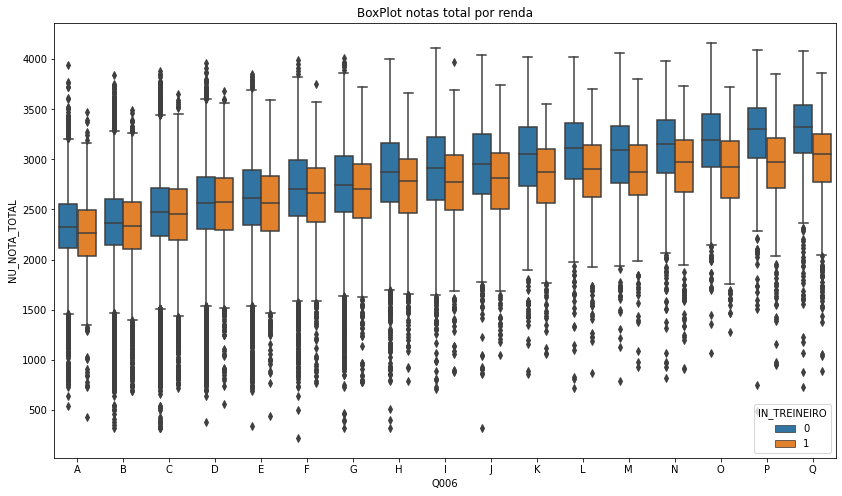

In [15]:
box("Q006", "NU_NOTA_TOTAL", "IN_TREINEIRO", df_sem_notas_zero, renda_ord, "BoxPlot notas total por renda") 